In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data=pd.read_csv("/content/train.csv")

In [11]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data=np.array(data)

In [26]:
m, n=data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape



In [19]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [20]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [21]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [22]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [23]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [24]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [27]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 6 1 ... 1 1 3] [7 1 8 ... 4 2 7]
0.0856829268292683
Iteration:  10
[2 6 8 ... 4 2 2] [7 1 8 ... 4 2 7]
0.13831707317073172
Iteration:  20
[2 6 8 ... 4 2 2] [7 1 8 ... 4 2 7]
0.21817073170731707
Iteration:  30
[2 6 8 ... 4 2 2] [7 1 8 ... 4 2 7]
0.2746585365853659
Iteration:  40
[8 3 8 ... 4 2 2] [7 1 8 ... 4 2 7]
0.32153658536585367
Iteration:  50
[8 3 8 ... 4 2 7] [7 1 8 ... 4 2 7]
0.37009756097560975
Iteration:  60
[8 3 8 ... 4 2 7] [7 1 8 ... 4 2 7]
0.41878048780487803
Iteration:  70
[8 3 8 ... 4 1 7] [7 1 8 ... 4 2 7]
0.47212195121951217
Iteration:  80
[8 3 8 ... 4 1 7] [7 1 8 ... 4 2 7]
0.5286585365853659
Iteration:  90
[8 1 8 ... 4 1 7] [7 1 8 ... 4 2 7]
0.5697073170731707
Iteration:  100
[8 1 8 ... 4 1 7] [7 1 8 ... 4 2 7]
0.5989024390243902
Iteration:  110
[8 1 8 ... 4 1 7] [7 1 8 ... 4 2 7]
0.6243170731707317
Iteration:  120
[1 1 8 ... 4 1 7] [7 1 8 ... 4 2 7]
0.6461951219512195
Iteration:  130
[1 1 8 ... 4 1 7] [7 1 8 ... 4 2 7]
0.6649268292682927
Iteration: 

Prediction:  [3]
Label:  3


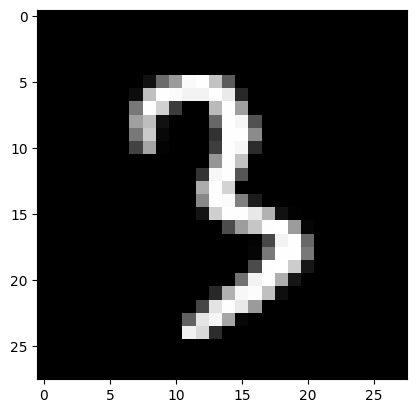

Prediction:  [7]
Label:  7


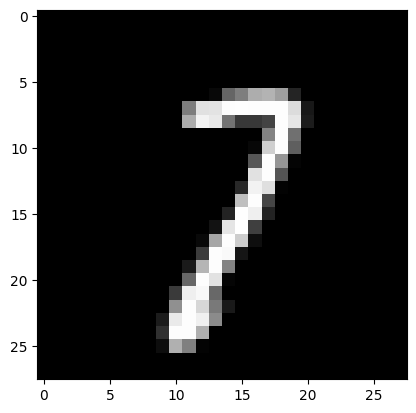

Prediction:  [4]
Label:  4


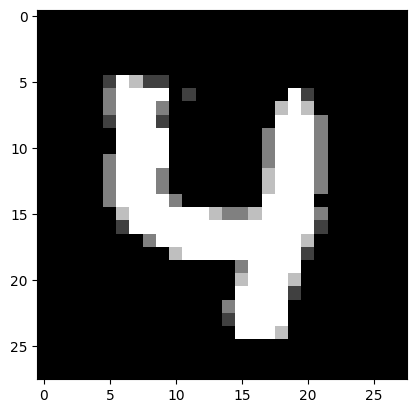

Prediction:  [7]
Label:  7


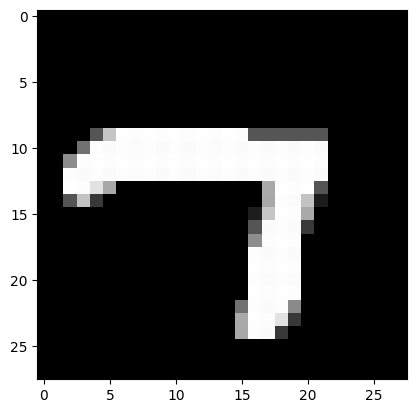

In [30]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(18, W1, b1, W2, b2)
test_prediction(108, W1, b1, W2, b2)
test_prediction(209, W1, b1, W2, b2)
test_prediction(300, W1, b1, W2, b2)


In [31]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)


[0 1 5 2 3 0 4 1 9 6 3 9 9 1 3 8 1 4 4 7 3 9 0 2 2 2 7 8 8 8 3 5 1 4 1 4 6
 1 6 4 7 5 0 0 9 6 1 0 1 4 1 6 7 0 4 4 9 1 9 4 3 3 9 0 3 9 7 4 0 1 4 0 0 7
 9 6 6 3 8 4 7 3 6 3 0 5 7 7 0 0 5 4 8 1 0 3 8 5 4 3 7 6 2 9 8 3 3 3 7 8 7
 1 6 4 6 6 1 9 2 6 3 0 0 8 3 6 0 5 7 5 6 4 6 8 1 4 3 0 1 0 9 1 1 2 5 7 3 4
 7 1 1 2 9 9 8 9 7 3 1 9 9 1 1 3 2 7 2 1 4 9 8 5 3 2 4 0 0 6 1 6 2 0 0 3 5
 3 3 5 7 6 0 8 8 3 9 9 6 7 0 1 9 0 2 6 8 3 0 1 6 6 1 3 9 3 9 4 3 6 7 7 9 4
 4 4 5 5 1 2 5 6 5 9 8 2 0 1 4 0 5 1 8 1 2 6 9 0 9 2 9 1 7 9 8 3 7 6 7 9 9
 7 6 3 9 2 1 7 3 0 5 5 4 0 4 8 2 4 1 8 5 6 7 9 1 8 0 9 6 2 4 1 2 1 1 1 5 3
 7 8 5 0 9 6 2 2 7 3 0 6 9 7 5 3 1 9 0 6 4 6 4 5 7 6 4 8 5 1 3 0 7 6 2 3 3
 2 2 7 0 5 9 8 6 8 5 8 4 8 9 2 1 3 5 7 6 4 2 1 3 7 6 0 9 7 9 1 0 1 8 5 3 6
 6 7 4 6 4 4 4 2 9 1 2 7 8 7 6 9 9 3 1 1 4 4 9 4 7 5 1 9 1 2 1 7 2 1 3 3 0
 4 0 8 9 6 9 3 3 2 4 8 0 8 3 5 2 9 1 1 7 9 1 3 3 9 1 8 7 9 6 7 6 4 2 4 6 7
 9 1 4 1 6 1 1 9 3 7 2 8 3 3 5 2 7 2 9 2 1 6 0 0 8 0 1 9 8 0 6 1 4 2 6 0 3
 7 0 3 2 9 6 2 0 5 3 1 9 

0.852